In [1]:
# !pip install requests
# !pip install requests-oauthlib
import requests
import json
import pandas as pd
import re
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
pd.options.display.max_columns = 200
%matplotlib inline

# module for waiting a few seconds to make calls ---> https://www.programiz.com/python-programming/time/sleep
import time

# https://stackoverflow.com/questions/30327153/seaborn-pylab-changing-xticks-from-float-to-int ---> keep x axis as integers
from matplotlib.ticker import MaxNLocator

In [2]:
# twitter info

# consumer key and secret
consumer_key = 'XMWctK4I5qK3mJLIepQ9PnCgp'
consumer_secret = 'oc0aDnxq5XG8DqepulsW91yGPXL8dXrabmAUg5XNxvHXgrJl2Z'

# authentication tokens
twitter_bearer = 'AAAAAAAAAAAAAAAAAAAAAGE%2BVgEAAAAAN7e4ZzvF7%2FGf6QfOM0bvwIAevW4%3DRITY7tyiqttWyc58AWeaQ5HOZKwHtlkVh89FrXbEJJ12SSIZmV'
twitter_access_token = '1346971614890450946-NuJkH7JhRnfCdnD1csiyEhIJQ0ge1h'
twitter_access_secret = 'rCSLfMUcNza67eHi8LDf0uvL3TqM6x6EKQKfnD933tpG7'

# app ID
app_id = '22429281'

In [22]:
# application-only OAuth2 Authorization

# based on client-credentials grant flows of the OAuth2 specification

# You can do application-only authentication using your apps consumer API keys, or by using a Bearer Token. 
# This means that the only requests you can make to a Twitter API must not require an authenticated user.

# The application-only auth flow follows these steps:
# An application encodes its consumer key and secret into a specially encoded set of credentials.
# An application makes a request to the POST oauth2/token endpoint to exchange these credentials for a 
# Bearer Token.
# When accessing the REST API, the application uses the Bearer Token to authenticate.

# for the above, we can skip steps 1 and 2 as we already have the bearer token generated 

# SSL required
# All requests (both to obtain and use the tokens) must use HTTPS endpoints.

# You can view the rate limit by using the GET application/rate_limit_status endpoint, 
# which supports application-only authentication. By issuing requests to this method with your 
# application Bearer Token, you'll receive a response indicating the current window's per-
# resource rate limiting context. Instead of receiving a "rate_limit_context" field indicating the 
# access token being used, you will receive a "application" field instead, with the value being your 
# application’s consumer key.

# So, since we have our bearer token all ready to go, we can skip lots of steps for obtaining the bearer token
# through POST authorization with consumer keys and secrets.
# Thus, on the page at https://developer.twitter.com/en/docs/authentication/oauth-2-0/application-only,
# we can ideally skip to step 3 'Authenticate API Requests with the Bearer Token'
# The example request under step 3 is in CURL though, so how do I write this type of function in raw python.
# For reference, I took a picture of the code. 

In [3]:
headers = {
    'Authorization': 'Bearer {}'.format(twitter_bearer),
    'Accept-Encoding': 'gzip',
}

# figured out the headers at this link 
# https://stackoverflow.com/questions/21651846/oauth-access-token-request-twitter-api-and-oauth-verifier-field/21653087#21653087

In [ ]:
# root URLs 

# user_url = 'https://api.twitter.com/2/users/' for tweet timelines for a specific user ---> add the username 
# after users/ and then do /tweets for their twitter timelines

# 'https://api.twitter.com/2/users/by/username/' ---> this is the url we use to get a user's twitter ID


# player_url = 'https://www.balldontlie.io/api/v1/players' ---> for the balldontlie API to look through player
# names so we can get a player's ID ---> once we get the ID we add it to /players/ID

# stats_url = 'https://www.balldontlie.io/api/v1/season_averages' ---> for a player's season averages

# games_url = 'https://www.balldontlie.io/api/v1/stats' ---> for a player's game stats

In [20]:
### Date Discovery

date1 = '20181022'
date2 = '20190513'

year1 = date1[0:4]
year2 = date2[0:4] # whether or not we have to make these integers is unclear ----> will have to make it 
# into a YYYY-MM-DD format though

month1 = date1[4:6]
month2 = date2[4:6]

day1 = date1[6:8]
day2 = date2[6:8]

print(day1)
print(day2)

print(month1)
print(month2) # this may mean we gotta keep the dates as strings ---> if we make them integers, it'll turn 05 
# into a simple 5 ---> keep the dates as strings, we keep the 05 which is useful for our info

print(year1)
print(year2)


print('Date 1: ' + '-'.join([year1, month1, day1])) # this gives us the first date


# print(date1[0:4])
# print(date2[0:4])

22
13
10
05
2018
2019
Date 1: 2018-10-22


In [5]:
### Pagination Discovery

lebron_req = requests.get("https://api.twitter.com/2/users/by/username/KingJames", headers=headers).json()
lebron_id = lebron_req['data']['id']
lebron_tweets = requests.get('https://api.twitter.com/2/users/'+lebron_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time=2020-06-30T00:00:00Z&end_time=2020-12-25T00:00:00Z&exclude=retweets', headers=headers).json()

# print(lebron_tweets)

# # # # FINALLY GOT PAGINATION TO WORK

season_tweets = {}

while 'next_token' in lebron_tweets['meta']:
    next_token = lebron_tweets['meta']['next_token']
    # print(next_token)
    lebron_tweets = requests.get('https://api.twitter.com/2/users/'+lebron_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time=2020-06-30T00:00:00Z&end_time=2020-12-25T00:00:00Z&exclude=retweets&pagination_token='+next_token, headers=headers).json()
    print(lebron_tweets)

{'data': [{'text': '✌🏾 Pick 6. Mr. Wade! 🌰 #GoBucks', 'created_at': '2020-11-21T19:47:46.000Z', 'id': '1330236481001107457'}, {'text': 'And just like that. 7-0 Good Guys! 🌰', 'created_at': '2020-11-21T17:15:00.000Z', 'id': '1330198036132339713'}, {'text': '🐺🐺🐺👑 https://t.co/jew3Xqt1hQ', 'created_at': '2020-11-20T20:34:26.000Z', 'id': '1329885838470119424'}, {'text': '🐺🐺🐺🐺🐺 🥃🥃 #AllForThePack https://t.co/FMsEPIQmeA', 'created_at': '2020-11-20T16:14:20.000Z', 'id': '1329820383298555905'}, {'text': 'Yessir!! 🔥🔥🔥🔥🔥🔥🔥🔥 https://t.co/7RvWBhiBi4', 'created_at': '2020-11-20T04:21:17.000Z', 'id': '1329640938193391616'}, {'text': '@djstephfloss It’s on now my G! Audio good', 'created_at': '2020-11-20T01:13:30.000Z', 'id': '1329593680336875520'}, {'text': '🔥🔥🔥🔥🔥🔥🔥🔥 https://t.co/Rl6jsUWLUa', 'created_at': '2020-11-20T00:21:34.000Z', 'id': '1329580609501425665'}, {'text': 'I swear I can’t with you man!!! What is your problem! 🤣🤣🤣🤣🤣🤣🤣. This has to stop, actually please don’t https://t.co/iz12EuMfVN',

{'data': [{'text': 'WE’RE CHAMPIONS!!!!!!!!! It just now hit me!! #LakerNation💜💛 🏆', 'created_at': '2020-10-13T03:31:03.000Z', 'id': '1315857556682674176'}, {'text': '👑&amp;〰️ https://t.co/ly1lY2xwgo', 'created_at': '2020-10-12T22:23:37.000Z', 'id': '1315780187032752128'}, {'attachments': {'media_keys': ['3_1315778046998192130']}, 'text': '444 https://t.co/KFOMfD2P7k', 'created_at': '2020-10-12T22:15:07.000Z', 'id': '1315778050697523200'}, {'text': 'We must be heard!!!.\xa0\xa0Thank you @lyft for supporting our fight against voter suppression.\xa0\xa0@morethanavote #BlackLivesMatter 🙏🏾👑 https://t.co/NerFIjNF2H', 'created_at': '2020-10-07T15:06:39.000Z', 'id': '1313858283673997315'}, {'text': '❤️❤️❤️❤️❤️❤️❤️🙏🏾👑 #IPromise *pinky swear https://t.co/Y5K1iyIJ5p', 'created_at': '2020-10-07T14:11:49.000Z', 'id': '1313844483528830977'}, {'text': '#IPromise #WeChampion 🙏🏾👑 https://t.co/kcCOV5o470', 'created_at': '2020-10-07T14:11:00.000Z', 'id': '1313844276166635522'}, {'attachments': {'media_k

{'data': [{'id': '1286754128065110016', 'text': '1st of many to come!!! Love our families who enter our doors!!! @IPROMISESchool Village 🏢 https://t.co/7OJoC0omXt', 'created_at': '2020-07-24T20:04:25.000Z'}, {'id': '1286745502936170503', 'text': 'Shoutout to my brother @ThisIsUD for leadership on this issue for all of us.  🙏🏾✊🏾❤️👑', 'created_at': '2020-07-24T19:30:09.000Z'}, {'id': '1286745338464948225', 'text': 'This is a fight about their constitutional right to vote being denied.\xa0Learn more about how you can help at https://t.co/ASKCSX9b9l. @morethanavote     https://t.co/LtGBRwo8LQ', 'created_at': '2020-07-24T19:29:29.000Z'}, {'id': '1286734140579225600', 'text': 'A must watch to understand what this man was fighting for 60 years!!! 🙏🏾👑 The right to vote should not come with a price tag! @morethanavote #CivilRightsICON ✊🏾\n \nhttps://t.co/xpnQkgogue', 'created_at': '2020-07-24T18:45:00.000Z'}, {'id': '1286377873901846529', 'text': '@KDTrey5 🤣🤣🤣🤣🤣🤣🤣🤣 Yo I was going to check on yo

In [37]:
### Twitter Data Structure Discovery

# start by using the user_lookup endpoint ---> from this we obtain user ID's

# with user ID's, we get the user's tweet timeline


# Example for username lookup: url = "https://api.twitter.com/2/users/by/username/TwitterDec"

lebron_req = requests.get("https://api.twitter.com/2/users/by/username/KingJames", headers=headers).json()

# lebron_req # this stores the id for the username we look up

lebron_id = lebron_req['data']['id'] # this is how we get store that ID
# print(lebron_id)

# next token for going through pages
next_token = '7140dibdnow9c7btw3z2gbzncif57xwdu0dtsnv96s2lx'

# Example for id tweet timeline lookup url = https://api.twitter.com/2/users/:id/tweets
lebron_tweets = requests.get('https://api.twitter.com/2/users/'+lebron_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&pagination_token=7140dibdnow9c7btw3z1mfpqx14huwboh6970xcy090zd', headers=headers).json()
lebron_tweets

# use the pagination token with the next_token proved in the meta data ---> go through pages of data for a year or more

# lebron_tweets['meta'] # has oldest tweet id, newest tweet id, result count of tweets, and next page token



# tweet_text = {}

# for i in lebron_tweets['data']: # this goes through each tweet 
    # print()
    # print(i['created_at'])
    # print()
    # print(i['text'].lower())
    # print()
    # print('*****')

    
    # tweet_text[i['created_at']] = i['text']
    
    # for item in i['text'].split(): # this can get all the words in the tweet, but we need to look for phrases
        # print(item)
    
# tweet_text   

print(lebron_tweets)

{'data': [{'text': '@_Cee1 Already! 🤦🏾\u200d♂️', 'id': '1428461685514272770', 'created_at': '2021-08-19T20:59:40.000Z'}, {'text': '@_Cee1 FACTS!!!!!!', 'id': '1428440695652511747', 'created_at': '2021-08-19T19:36:15.000Z'}, {'text': 'THANK YOU! As if I didn’t need more to⛽️ ME! #Washed👑', 'id': '1428434149522632709', 'created_at': '2021-08-19T19:10:14.000Z'}, {'text': '@CuffsTheLegend #SUPERWASHED 🗑', 'id': '1428420748792655873', 'created_at': '2021-08-19T18:16:59.000Z'}, {'text': 'https://t.co/6zs7epLMjX Yo James Whitner this is so 🔥🔥🔥🔥🔥🔥. You literally took me back to my days in the hood (being part of a singer mother household) with the homies! You captured it to perfection. Salute G! 🙏🏾✊🏾🤎👑', 'id': '1428191863597461508', 'created_at': '2021-08-19T03:07:29.000Z'}, {'text': '@pr_RWTW @TopDawgEnt 📠!! Open invite plus more for https://t.co/ZWXWn8dbOL!!', 'id': '1428055279262785538', 'created_at': '2021-08-18T18:04:45.000Z'}, {'text': '🔥🔥🔥🔥🔥🔥🔥🔥 https://t.co/bF7SeSCSxJ', 'id': '142805501

In [12]:
### Twitter Data Structure Discovery

harden_req = requests.get("https://api.twitter.com/2/users/by/username/JHarden13", headers=headers).json()

harden_id = harden_req['data']['id']

harden_tweets = requests.get("https://api.twitter.com/2/users/"+str(harden_id)+'/tweets?tweet.fields=attachments,text,created_at&max_results=100&start_time=2016-01-01T00:00:00Z&end_time=2018-01-01T00:00:00Z', headers=headers).json()

harden_tweets


        
    

# if 'next_token' in elon_tweets['meta']:
    # next_token = elon_tweets['meta']['next_token']

# elon_list = []
# print(len(elon_list))
            

# for i in elon_tweets['data']:
    # elon_list.append(i)
    
# if 'next_token' not in elon_tweets['meta']:
    # print(elon_list)
# else:
    # next_token = elon_tweets['meta']['next_token']
    # elon_two = requests.get('https://api.twitter.com/2/users/'+elon_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time=2020-01-01T00:00:00Z&end_time=2021-11-29T00:00:00Z&pagination_token='+str(next_token),headers=headers).json()
    # print(elon_two)
    
    # for z in elon_two['data']:
        # elon_list.append(z)
    
# print(len(elon_list)) # the list is of length 100 ---> if it's 100, check if there is a next_token
# if yes, do another request and add those tweets ---> len just has to be % 100 == 0

# if len(elon_list) % 100 == 0:
    # print('yes')
    
    # if 'next_token' in elon_tweets['meta']:
        # next_token = str(elon_tweets['meta']['next_token'])
        # elon_two = requests.get('https://api.twitter.com/2/users/'+elon_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time=2018-01-01T00:00:00Z&end_time=2021-11-29T00:00:00Z&pagination_token='+next_token,headers=headers).json()
        
        # print(elon_two)
        
        # for z in elon_two['data']:
            # elon_list.append(z)

{'data': [{'text': '#ad Yes, @CP3 and his @StateFarm agent do things together. No, I don’t want to be included in their antics. https://t.co/4iZVSjVYfx',
   'id': '945370128933322754',
   'created_at': '2017-12-25T19:06:17.000Z',
   'attachments': {'media_keys': ['7_945369904110116864']}},
  {'text': '🤘🏾Heard some guy on our team got player of the week🤔🤔🤔🤔🤔 @CP3 lol congrats bro. #LockedIn🔐 #RedNation🚀 https://t.co/d5AznhaDBX',
   'id': '942974132911828992',
   'created_at': '2017-12-19T04:25:27.000Z',
   'attachments': {'media_keys': ['3_942974075298660352']}},
  {'text': '👀👀👀👀 🔐 https://t.co/HBwvPlOC2j',
   'id': '942811073002000384',
   'created_at': '2017-12-18T17:37:31.000Z'},
  {'text': 'You can watch me in the #LaceUpSeries on @YouTube here: https://t.co/Ldlb8pGXR0',
   'id': '941434687582556160',
   'created_at': '2017-12-14T22:28:15.000Z'},
  {'text': 'Watch it now on @YouTube and grab the winning Harden PENSOLE kicks, in stores now https://t.co/70jyGJ3dDD',
   'id': '94138212

In [25]:
### Start and End Date Discovery for User Twitter Timelines

# let's try to get all of a user's tweets for a given period of time 

# so the endpoint for user tweet timelines by ID has a start_time and end_time parameter that can be added to 
# the request

# to pass a time into these parameters, we need a start and end time in ISO 8601 format

# ISO 8601 ----> YYYY-MM-DDTHH:MM:SS.SSSZ
# https://www.iso.org/iso-8601-date-and-time-format.html 

# so, let's get Lebron's tweets from May 31 to June 8th in 2018 (2018 finals of Cavs vs. Warriors)


lebron_req = requests.get("https://api.twitter.com/2/users/by/username/KingJames", headers=headers).json()
lebron_id = lebron_req['data']['id']

# let's try a season since it seems like Lebron didn't tweet during those finals

user_url = 'https://api.twitter.com/2/users/'

lebron_2018_season_req = requests.get(user_url+lebron_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time=2017-10-17T00:00:00Z&end_time=2018-05-14T23:59:59Z',headers=headers).json()
# print(lebron_2018_season_req)

# seems like we got the correct number of tweets back for the season

# let's try to exclude retweets and replies just to compare 

start_date = '2016-10-25'
end_date = '2017-06-12' # these are the dates for the 2014 season 

lebron_2018_exclusions_req = requests.get(user_url+lebron_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time='+start_date+'T00:00:00Z&end_time='+end_date+'T23:59:59Z&exclude=retweets',headers=headers).json()
# print(lebron_2018_exclusions_req['meta'])

# so, if we want to use the range of tweets, we'll have to provide start and end date parameters within a function

# no good way of telling when you've gotten all possible tweets for a season 

# lebron does lots of replies and way fewer retweets 

num_tweets = 0

for i in lebron_2018_exclusions_req['data']:
    # print()
    # print(i['created_at'])
    # print(i['text'])
    # print()
    # print('*****')
    num_tweets += 1
    
# print(num_tweets) # this tells us a lot ---> when it equals 100, we know to make another request    

if num_tweets == 100:
    
    next_page = str(lebron_2018_exclusions_req['meta']['next_token'])
    
    # print(next_page)
    
    next_req = requests.get(user_url+lebron_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time='+start_date+'T00:00:00Z&end_time='+end_date+'T23:59:59Z&exclude=retweets&pagination_token='+next_page,headers=headers).json()
    
    for f in next_req['data']:
        # print(f)
        num_tweets += 1
        
        if num_tweets == 200:
            
            three_page = str(next_req['meta']['next_token'])
            
            three_req = requests.get(user_url+lebron_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time='+start_date+'T00:00:00Z&end_time='+end_date+'T23:59:59Z&exclude=retweets&pagination_token='+three_page,headers=headers).json()
                      

print(num_tweets)
    
    

# print(lebron_2018_exclusions_req['data'][-1]['created_at'])
    
    
    
# print('Last Tweet: ' + str(lebron_2018_exclusions_req['data'][-1])) gets the last tweet in the request page 


    
# first one goes from 2018-01-27 to 2018-04-14
# result count is kinda useless 

# then, when we use the pagination token with the next_token ----> scrolls to the next page and gets more results
# gives us from 2017-11-24 to 2018-01-27

# we'll have to have a line of code that sets our pagination_token == next_token in the request for future
# requests

# how can we go through the next pages to check if the results/created_at are within the time frame that we want?


164


In [40]:
### Balldontlie API discovery

# balldontlie API for NBA stats

# root_url = 'https://www.balldontlie.io/api/v1/players'

# so a total of 38 pages to go through

# for i in range(1,39):
    
    # page_req = requests.get(root_url+'?per_page=200&page='+str(i)).json()
    
    
# print(page_req)
        

# nba_players = requests.get("https://www.balldontlie.io/api/v1/players?per_page=200&page=2").json() # this just gets all
# players
# nba_players



# we can then use players' ID's, as found in the above request, to get requests for specific players

# for i in nba_players:
    # print(i)
    
#print(nba_players['meta']) # meta shows total_pages, current_page, next_page, per_page, and total_count (of players)

# we'll use total_pages to go through all the pages for searching for a particular playerID

# for i in nba_players['data']:
    # print(str(i['id'])+': ' + i['first_name']+''.join(' '+i['last_name']))
    # print(str(i['first_name']) + ' '+str(i['last_name']))
    # print('***')
    
    # print(i['first_name']+''.join(' '+i['last_name'])) # print first and last name
    


{'data': [{'id': 3547305, 'first_name': 'Nate', 'height_feet': None, 'height_inches': None, 'last_name': 'Darling', 'position': '', 'team': {'id': 4, 'abbreviation': 'CHA', 'city': 'Charlotte', 'conference': 'East', 'division': 'Southeast', 'full_name': 'Charlotte Hornets', 'name': 'Hornets'}, 'weight_pounds': None}, {'id': 17895750, 'first_name': 'Steven', 'height_feet': None, 'height_inches': None, 'last_name': 'Enoch', 'position': 'F', 'team': {'id': 17, 'abbreviation': 'MIL', 'city': 'Milwaukee', 'conference': 'East', 'division': 'Central', 'full_name': 'Milwaukee Bucks', 'name': 'Bucks'}, 'weight_pounds': None}, {'id': 17895751, 'first_name': 'John', 'height_feet': None, 'height_inches': None, 'last_name': 'Mooney', 'position': 'F', 'team': {'id': 17, 'abbreviation': 'MIL', 'city': 'Milwaukee', 'conference': 'East', 'division': 'Central', 'full_name': 'Milwaukee Bucks', 'name': 'Bucks'}, 'weight_pounds': None}, {'id': 17895752, 'first_name': 'Mike', 'height_feet': None, 'height_in

In [32]:
### Finding a Player with the Balldontlie API Discovery

root_url = 'https://www.balldontlie.io/api/v1/players'

# might be able to remove the entire team_name parameter ---> let's put it back if needed

def find_player(player_name, season_year):
    
    player_name_id = {}
    
    # team_id = {}
    
    for i in range(1,39):
        
        page_req = requests.get(root_url+'?per_page=200&page='+str(i)).json()
        
        for i in page_req['data']:
            
            current_name = i['first_name']+''.join(' '+i['last_name'])
            
            if player_name == current_name:
                
                # print(str(i['id'])+': '+ player_name) # print the player's ID and name
                
                player_name_id[player_name] = str(i['id'])
                
    
    if len(player_name_id) == 0:
        print('Try another player name.')
        return
                
    # print(player_name_id) # this stores our player and their ID
    

    # player_url = 'https://www.balldontlie.io/api/v1/players/'

    # player_req = requests.get(player_url+player_name_id[player_name]).json()
    
    # print(player_req)
    
    # team_url = 'https://www.balldontlie.io/api/v1/teams'
    
    # team_req = requests.get(team_url).json()
    
    # print(team_req)
    
    # for i in team_req['data']:
        
        # if team_name == i['full_name']:
            # print(str(i['id'])+': ' + i['full_name'])
            # team_id[team_name] = str(i['id'])
            
    # print(team_id)
    
    # api/v1/season_averages?season=2018&player_ids[]=1&player_ids[]=2 
    # will return regular season averages for player_ids 1 and 2.
    
    stats_url = 'https://www.balldontlie.io/api/v1/season_averages'
    
    stats_req = requests.get(stats_url+'?season='+str(season_year)+'&player_ids[]='+str(player_name_id[player_name])).json() # we could do this for multiple people at a time if we wanted
    
    # print(stats_req)
    
    
    
    for i in stats_req['data']: # this request also gives us the player_id in the data but we need the id to make the request in the first place
        stats_dict = i
        
    return stats_dict # maybe I don't want this in a function at all so that I can just store the data how I want? 
            
    
    


In [35]:
lebron_stats = find_player('LeBron James', '2016') # this kinda crashes randomly but works well 
# most of the time

{'games_played': 74, 'player_id': 237, 'season': 2016, 'min': '37:45', 'fgm': 9.95, 'fga': 18.16, 'fg3m': 1.68, 'fg3a': 4.62, 'ftm': 4.84, 'fta': 7.18, 'oreb': 1.31, 'dreb': 7.32, 'reb': 8.64, 'ast': 8.73, 'stl': 1.24, 'blk': 0.59, 'turnover': 4.09, 'pf': 1.81, 'pts': 26.41, 'fg_pct': 0.548, 'fg3_pct': 0.363, 'ft_pct': 0.674}


In [36]:
lebron_stats

In [116]:
### Initial get_tweet_info Function Discovery

# player_name = string
# years = list of strings
# user_name = string 

# [2015, 2016, 2017]

def get_tweet_info(player_name, years, user_name):
    
    # add a space for the headers? 
    
    # get the player id 
    players_url = 'https://www.balldontlie.io/api/v1/players'
    user_url = 'https://api.twitter.com/2/users/'
    id_url = 'https://api.twitter.com/2/users/by/username/'
    stats_url = 'https://www.balldontlie.io/api/v1/season_averages'
    
    name_id = {}
    
    for i in range(1,39):
        
        # wait a little so we can save more time for more data calls
        time.sleep(0.5)
        
        page_req = requests.get(players_url+'?per_page=200&page='+str(i)).json()
        
        for p in page_req['data']:
            
            current_name = p['first_name']+''.join(' '+p['last_name'])
            
            if player_name == current_name:
                
                name_id[player_name] = str(p['id'])
                break # this will stop the for loop after the condition is met ---> found here: https://www.tutorialspoint.com/python/python_loop_control.htm
                
    if len(name_id) == 0:
        print('Try another name.')
        return
    
    # season tweet dict
    season_tweets = {}
    
    # season ppg dict
    ppg_stats = {}
                
    # look through the season stats endpoint
    season_stats_url = 'https://www.balldontlie.io/api/v1/stats' # this will be used to get season start and end dates
    
    ### Before you can do a tweets request, we'll have to get the player's twitter ID to use for requests 
    id_req = requests.get(id_url+user_name, headers=headers).json()
    twitter_id = id_req['data']['id']
    
    # dates = [] # we want this empty list inside the below for i in years loop ---> these dates will be used
    # to make a start and end date for each season 
    
    # do an if statement to check the len of the dictionary
    if type(years) == list:
        
        for h in years:
            
            # check each year to see what's happening
            #print(h)
            
            # tell the function to wait a little so we can make more than 60 requests to balldontlie if we need
            time.sleep(1)
            
            season_tweets[h] = [] # create an empty dictionary of lists ---> each year's value will be a list of player's tweets for that year
            
            
            # get the start and end date 
            start_date = '' # we'll just set them as empty strings so we can simply pass them into the requests
            end_date = ''
            dates = [] # we'll make a list for a season's game dates ---> we'll go through this list and set the start and end dates equal to the respective date values
            
            
            # do a request of each player's game stats for each season ---> these game stats hold the dates we want
            season_req = requests.get(season_stats_url+'?seasons[]='+str(h)+'&player_ids[]='+str(name_id[player_name])).json() 
            
            for a in season_req['data']:
                dates.append(a['game']['date'])
            
            # print(season_req['meta']['total_pages'])
            
            if season_req['meta']['total_pages'] > 1:
                for f in range(2, (season_req['meta']['total_pages']+1)):
                    time.sleep(1)
                    season_req = requests.get(season_stats_url+'?seasons[]='+str(h)+'&player_ids[]='+str(name_id[player_name])+'&page='+str(f)).json()
                    # print(new_req)
                    for y in season_req['data']:
                        dates.append(y['game']['date'])
            
            
            # slicing up the dates to get start and end dates ---> when we compare the dates as integers, we can pick greater or lower dates
            for item in dates:
                
                if (len(start_date)==0) & (len(end_date)==0):
                    start_date = item
                    end_date = item
                    
                elif int(item[0:4]) > int(end_date[0:4]):
                    end_date = item
                    
                elif (int(item[5:7]) > int(end_date[5:7])) & (int(item[0:4]) == int(end_date[0:4])):
                    end_date = item
                    
                elif (int(item[8:10]) > int(end_date[8:10])) & (int(item[5:7]) == int(end_date[5:7])) & (int(item[0:4]) == int(end_date[0:4])):
                    end_date = item
                    
                elif int(item[0:4]) < int(start_date[0:4]):
                    start_date = item
                    
                elif (int(item[5:7]) < int(start_date[5:7])) & (int(item[0:4]) == int(start_date[0:4])):
                    start_date = item
                    
                elif (int(item[8:10]) < int(start_date[8:10])) & (int(item[0:4]) == int(start_date[0:4])) & (int(item[5:7]) == int(start_date[5:7])):
                    start_date = item
                    
            # start_date = str(season_req['data'][0]['game']['date']) for the first date ---> some seasons don't work as easy as this so I had to use the above code
            # end_date = str(season_req['data'][-1]['game']['date']) for the last date
            
            # check what's going on with the dates and twitter_id
            #print(twitter_id)
            #print(start_date) 
            #print(end_date)
            
            # this will control for years where players were injured or didn't play
            if (len(start_date)==0) & (len(end_date)==0): 
                season_tweets[h].append(0)
            
            # for every other year where they did play
            else:
                
                twitter_req = requests.get(user_url+twitter_id+'/tweets?start_time='+start_date+'&end_time='+end_date+'&exclude=retweets&max_results=100&tweet.fields=created_at,text', headers=headers).json()
                
                # check the request to see what's happening
                print(twitter_req)
                
                
                if 'next_token' in twitter_req['meta']:
                    for x in twitter_req['data']:
                        season_tweets[h].append(x)
                    while 'next_token' in twitter_req['meta']:
                        next_token = twitter_req['meta']['next_token']
                        twitter_req = requests.get(user_url+twitter_id+'/tweets?max_results=100&tweet.fields=created_at,text&start_time='+start_date+'&end_time='+end_date+'&exclude=retweets&pagination_token='+next_token, headers=headers).json()
                        
                        # again, check to see what's going on
                        #print(twitter_req)
                        
                        for g in twitter_req['data']:
                            season_tweets[h].append(g)
                            
                else:
                    # print(twitter_req)
                    if twitter_req['meta']['result_count']!=0:
                        for t in twitter_req['data']:
                            season_tweets[h].append(t)
                            
                    else:
                        season_tweets[h].append(0)
                    # for t in twitter_req['data']:
                        # season_tweets[h].append(t)
                        
                
            stats_req = requests.get(stats_url+'?season='+str(h)+'&player_ids[]='+str(name_id[player_name])).json()
            
            # print(h)
            #print(stats_req)
            
            for c in stats_req['data']:
                # print(c['pts'])
                ppg_stats[h] = float(c['pts'])
                
                
                
            # everything below will go into this else^ statement to control for non-years
            
            # now that we've got start and end dates, it makes sense to look at the tweets in that time
            # twitter_req = requests.get(user_url+twitter_id+'/tweets?start_time='+start_date+'&end_time='+end_date+'&exclude=retweets&max_results=100&tweet.fields=created_at,text', headers=headers).json() # figure out how you'll do this request ---> you also have to use the information from this request in a way that gets properly saved after the for loop
            # print(twitter_req) # check what's going on with the request
            
            # AFTER WE GET THE REQUEST HERE, WE JUST HAVE TROUBLE COUNTING THROUGH THE REQUEST
            
            # print(twitter_req)
            # print()
            # print('*****')
            
            # for x in twitter_req['data']:
                # season_tweets[i].append(x)
                
            #if 'next_token' in twitter_req['meta']:
                #for x in twitter_req['data']:
                    #season_tweets[h].append(x)
                #while 'next_token' in twitter_req['meta']:
                    #next_token = twitter_req['meta']['next_token']
                    #twitter_req = requests.get(user_url+twitter_id+'/tweets?max_results=100&tweet.fields=created_at,text&start_time='+start_date+'&end_time='+end_date+'&exclude=retweets&pagination_token='+next_token, headers=headers).json()
                    #print(twitter_req)
                    #for g in twitter_req['data']:
                        #season_tweets[h].append(g)
                        
            #else:
                #for t in twitter_req['data']:
                    #season_tweets[h].append(t)
            
            # while 'next_token' in twitter_req['meta']:
                # next_token = twitter_req['meta']['next_token']
                # print(next_token)
                # twitter_req = requests.get(user_url+twitter_id+'/tweets?max_results=100&tweet.fields=attachments,created_at,text&start_time='+start_date+'&end_time='+end_date+'&exclude=retweets&pagination_token='+next_token, headers=headers).json()
                # for g in twitter_req['data']:
                    # season_tweets[h].append(g)
            
            # use these to help when checking what's going on under the hood as it'll separate each year 
            # from each other
            # print()
            # print('*****')
            # print()
            
            
            
                
            
    else:
        print('Years must be in a list.')
        return
    
    # season_req = requests.get(season_stats_url+'?seasons[]=2016&seasons[]=2015&player_ids[]=237').json()
        
    # while you're at it, set some stats variables equal to stuff?
    
    # then, using the twitter API, we'll use the users endpoint with the given start and end date and 
    # the user_name
    
    # do operations to get num_tweets for the given season 
    
    # look through the salaries and players csvs
    player_salaries = pd.read_csv('salaries_1985to2018.csv')
    players = pd.read_csv('players.csv')
    
    # print(type(player_salaries))
    
    # get the player_id from the players csv ---> credit the stack below
    # https://stackoverflow.com/questions/53255796/how-to-get-a-single-value-as-a-string-from-pandas-data-frame
    salary_id = players.loc[players['name']==player_name, '_id'].item()
    
    # check to see if we got the right one
    # print(salary_id)
    
    # get the years in the csv
    player_salary = player_salaries.query("player_id == @salary_id")[['player_id', 'season_start', 'salary', 'team']] # .loc[player_salaries['season_start'] in a.item(years)] ---> how do I get the season_start values from the years values ---> I could just select the columns I want
    # player_salary = player_salary.loc[years]
    
    # for  row in player_salary.iterrows(): 
        # for year in years:
            # if row['season_start'] == year:          
                # print(row)
                
                
    # year_i_want = [2015, 2016, 2017]#   # data[season_start].isin(year_i_want) ---> Tian helped with this ---> without loc, this returns bools, but with loc, it gives me what I want
    player_salary = player_salary.loc[player_salary['season_start'].isin(years)]
    
            
    # isin()
    
    # for year in years:
        
    
    # how do I match across csv's?
    #print(player_salary)
    
    # got this from Tian
    season_tweets_df = pd.DataFrame(season_tweets.items()) # ---> name the year column season_start so we can match on columns
    season_tweets_df.columns = ['season_start', 'tweets']
    season_tweets_df['num_tweets'] = season_tweets_df['tweets'].apply(lambda x: len(x))
    
    
    ppg_stats_df = pd.DataFrame(ppg_stats.items())
    ppg_stats_df.columns = ['season_start', 'ppg']
    
    
    # pd.concat(    # pd.concat())
    # pd.merge(outer, on=season_start) ---> from Tian
    
    # from: https://www.tutorialspoint.com/python-merge-pandas-dataframe-with-outer-join
    # mergedRes = pd.merge(dataFrame1, dataFrame2, on ='Car', how ="outer")
    new_df = pd.merge(player_salary, season_tweets_df, on='season_start', how='outer')
    merged_df = pd.merge(new_df, ppg_stats_df, on='season_start', how='outer')
    
    return merged_df
    
    # print(start_date)
    # print(end_date)
    # for key in season_tweets:
          # print('Number of Tweets in ' + str(key)+': ' + str(len(season_tweets[key])))
            
    # convert season_tweets to a pandas dataframe and combine datasets
    #season_tweets_df = pd.DataFrame.from_dict(season_tweets)
            
        
            
    
    # check the dictionary to see what's happening
    #print()
    #print('*****')
    #print()
    #print(season_tweets)
            
            
    # print(player_salaries)
    
    
    
    # print(ppg_stats_df)
    
    
    
    #print(merged_df)
    #return merged_df
    
    #fig,ax1 = plt.subplots() # first axis
    #sb.lineplot(x='yearID', y='HR', data=sosa_mcg_grouped, hue='playerID', ax=ax1) # uses the first axis # could add marker='d'
    #ax2 = ax1.twinx() # this creates the second axis object
    #sb.lineplot(x='yearID', y='HR/G', data=sosa_mcg_grouped, hue='playerID', ax=ax2, marker='h') # uses the second axis
    
    # https://seaborn.pydata.org/generated/seaborn.lineplot.html
    #sb.set(rc={'figure.figsize':(9,5)})
    #fig,ax1 = plt.subplots()
    #sb.lineplot(x='salary', y='ppg', data=merged_df, ax=ax1, palette='blue',label='ppg', legend=False).set(title='Tweets, Salary, and Points per Game', ylim=(0,40), ylabel='PPG')
    #ax2 = ax1.twinx()
    #sb.lineplot(x='salary', y='num_tweets', data=merged_df, ax=ax2, color='orange', label='tweets', legend=False).set_ylabel(ylabel='Tweets',rotation=270)
    #ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr
    #ax2.yaxis.labelpad = 25    
    # plt.legend()
    #ax.figure.legend
    #plt.show()
    
    # marker ---> to the lines
    
     
    #ax.yaxis.set_position([.5, 1.1])
    
    
    # not setting a ylim for the num_tweets may reveal stuff about players' RELATIVE tweet changes

In [110]:
get_tweet_info('Lebrun James,', [2014, 2015], 'KongJams') # name error check works

Try another name.


In [111]:
get_tweet_info(2, [2014, 2015], 'KingJames') # name error check works well

Try another name.


In [113]:
get_tweet_info('LeBron James', ['2015', '2016'], 'KingJames') # need a check to make sure years are integers

,player_id,salary,team,season_start,tweets,num_tweets,ppg
0,NaN,NaN,NaN,2015,"[{'created_at': '2016-04-17T03:06:45.000Z', 'i...",15,25.26
1,NaN,NaN,NaN,2016,"[{'created_at': '2017-04-15T03:40:08.000Z', 'i...",164,26.41


In [114]:
get_tweet_info('LeBron James', [2015, 2016], 'KingJames')

,player_id,season_start,salary,team,tweets,num_tweets,ppg
0,jamesle01,2015,22971000,Cleveland Cavaliers,"[{'created_at': '2016-04-17T03:06:45.000Z', 'i...",15,25.26
1,jamesle01,2016,30963450,Cleveland Cavaliers,"[{'created_at': '2017-04-15T03:40:08.000Z', 'i...",164,26.41


In [117]:
get_tweet_info('LeBron James', [2015, 2016], 'KongJams') # need a check for twitter_req errors

{'errors': [{'resource_id': '971905731459915777', 'parameter': 'id', 'resource_type': 'user', 'section': 'data', 'title': 'Authorization Error', 'value': '971905731459915777', 'detail': 'Sorry, you are not authorized to see the user with id: [971905731459915777].', 'type': 'https://api.twitter.com/2/problems/not-authorized-for-resource'}]}


KeyError: 'meta'

In [124]:
### Error Response Discovery

error_dict = {'errors': [{'five': '23', 'parameter': 'id', 'detail': 'No authorization.'}]}

# print(error_dict['errors'])

first_item = list(error_dict.keys())[0]

print(first_item)

# for item in error_dict:
    # if item == 'errors':
        # print('poo')
    # if 'error' in item:
        # print('poo poo')

if 'error' in first_item:
    print('poo')

errors
poo


In [21]:
lebron_df = get_tweet_info('LeBron James', [2012, 2013, 2014, 2015, 2016, 2017], 'KingJames')
print(lebron_df)

   player_id  season_start    salary                 team  \
0  jamesle01          2012  17545000           Miami Heat   
1  jamesle01          2013  19067500           Miami Heat   
2  jamesle01          2014  20644400  Cleveland Cavaliers   
3  jamesle01          2015  22971000  Cleveland Cavaliers   
4  jamesle01          2016  30963450  Cleveland Cavaliers   
5  jamesle01          2017  33285709  Cleveland Cavaliers   

                                              tweets  num_tweets    ppg  
0                                                [0]           1  26.79  
1                                                [0]           1  27.13  
2                                                [0]           1  25.26  
3  [{'created_at': '2016-04-17T03:06:45.000Z', 'i...          15  25.26  
4  [{'created_at': '2017-04-15T03:40:08.000Z', 'i...         164  26.41  
5  [{'created_at': '2018-04-14T14:06:12.000Z', 'i...         249  27.45  


In [108]:
### Initial create_plot Function Discovery

def create_plot(player_name, data_frame):
    
    no_space_name = player_name.replace(' ', '_')
    
    # Plotting 
    sb.set(rc={'figure.figsize':(9,5)}, style='white') # if we didn't want the box around the line plots, we could do style='dark'
    fig,ax1 = plt.subplots()
    sb.lineplot(x='salary', y='ppg', data=data_frame, ax=ax1, color='#F97306', label='ppg', legend=False, marker='o').set(title='Tweets, Salary, and Points per Game: '+str(player_name), ylim=(0,40), ylabel='PPG', xlabel='Salary')
    ax2 = ax1.twinx()
    # using the mako palette for tweets as the palette matches the twitter color style
    sb.lineplot(x='salary', y='num_tweets', data=data_frame, ax=ax2, palette='mako', label='tweets', legend=False).set_ylabel(ylabel='Tweets',rotation=270)
    ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
    # https://stackoverflow.com/questions/43875258/how-to-change-the-positions-of-subplot-titles-and-axis-labels-in-seaborn-facetgr
    ax2.yaxis.labelpad = 15    
    # plt.legend()
    ax1.figure.legend()
    ax2.figure.legend()
    plt.savefig(str(no_space_name)+'_stats.png') # savefig must be here before plt.show() for it to properly save
    plt.show()
    
    # plt.savefig('_stats.png') # change player name to lebron_james using .join or something

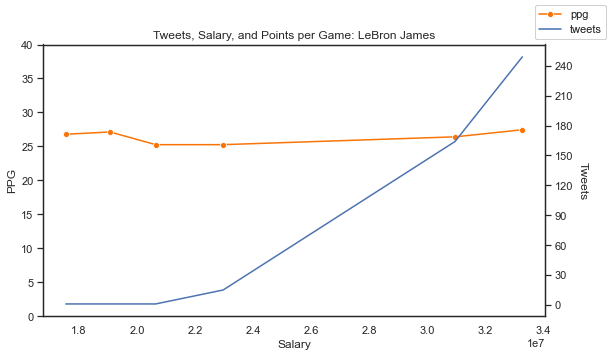

In [109]:
create_plot('LeBron James', lebron_df)

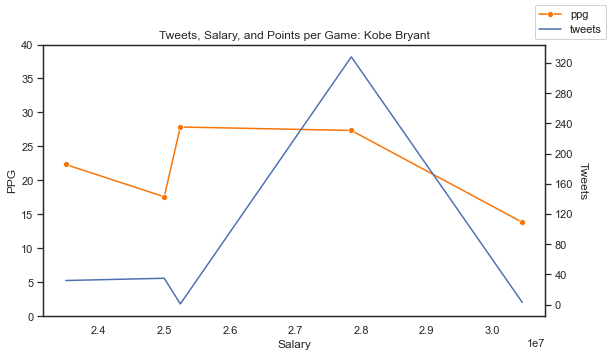

In [101]:
create_plot('Kobe Bryant', kobe_df)

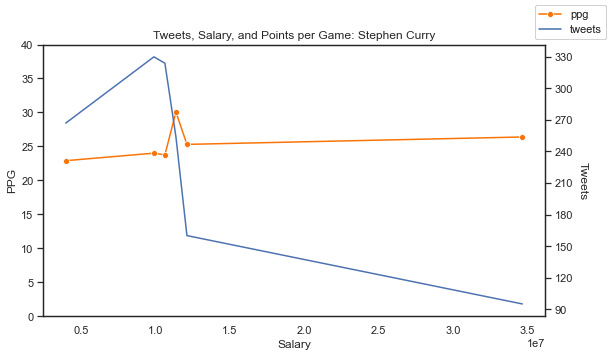

In [102]:
create_plot('Stephen Curry', steph_df)

In [32]:
kobe_df = get_tweet_info('Kobe Bryant', [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], 'kobebryant')

# we'll have to add a control for start_time parameters going before 2010-11-06
# error: {'errors': [{'parameters': {'Field Validation Errors': ['The `start_time` parameter value must be 
# more recent than 2010-11-06T00:00:00-00:00.']}, 'message': 'ValidationError'}], 'title': 'Invalid Request', 
# 'detail': 'One or more parameters to your request was invalid.', # 'type': 'https://api.twitter.com/2/problems/invalid-request'} 
# this f*cks our function

# need a check for whether we've given years before or equal to 2010 and after or equal to 2018

In [38]:
steph_df = get_tweet_info('Stephen Curry', [2012, 2013, 2014, 2015, 2016, 2017], 'StephenCurry30')

<Figure size 720x432 with 0 Axes>

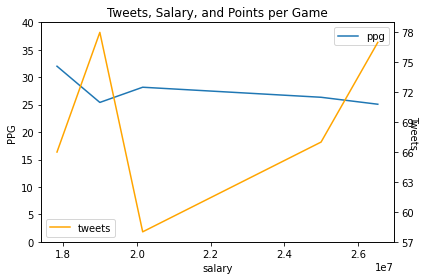

In [39]:
get_tweet_info('Kevin Durant', [2013, 2014, 2015, 2016, 2017], 'KDTrey5')

# run into a problem with 2019 for some reason ---> Kevin Durant is injured in 2019 so he has no game stats --->
# when there are no start or end dates for players (for whatever reason like injuries above), we have to set
# the number of tweets for that season either to a string that says missing, 0, or 999

# now, values of 1 for number of tweets for a season correspond to a year in which the player did not play

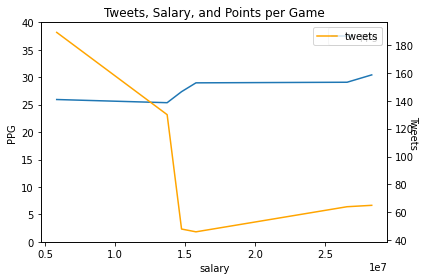

In [36]:
get_tweet_info('James Harden', [2012, 2013, 2014, 2015, 2016, 2017], 'JHarden13')

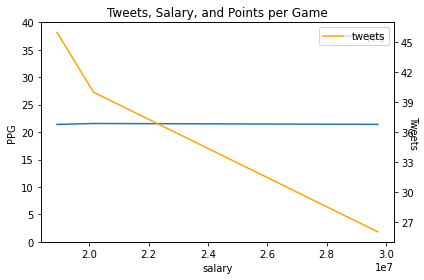

In [37]:
get_tweet_info('Blake Griffin', [2015, 2016, 2017], 'blakegriffin23')

In [30]:
get_tweet_info('Russell Westbrook', 2015, 'russwest44') # handles that error correctly

Years must be in a list.


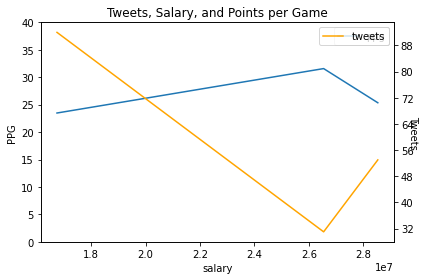

<Figure size 720x432 with 0 Axes>

In [41]:
get_tweet_info('Russell Westbrook', [2015,2016,2017], 'russwest44')

<class 'pandas.core.frame.DataFrame'>


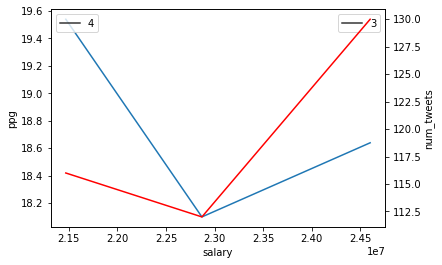

In [46]:
get_tweet_info('Chris Paul', [2015, 2016, 2017], 'CP3')

In [87]:
### Setting Start and End Date Discovery

season_req = requests.get('https://www.balldontlie.io/api/v1/stats?seasons[]=2018&player_ids[]=237').json()

# print(season_req)

date_list = []

start_date = ''
end_date = ''


for i in season_req['data']:
    print()
    print(i['game']['date'])
    print()
    print('*****')
    
    if (len(start_date) == 0) & (len(end_date) == 0):
        start_date = i['game']['date']
        end_date = i['game']['date']
        
    elif int(i['game']['date'][0:4]) > int(end_date[0:4]):
        end_date = i['game']['date']
        
    elif (int(i['game']['date'][5:7]) > int(end_date[5:7])) & (int(i['game']['date'][0:4]) == int(end_date[0:4])):
        end_date = i['game']['date']
        
    elif (int(i['game']['date'][8:10]) > int(end_date[8:10])) & (int(i['game']['date'][5:7]) == int(end_date[5:7])) & (int(i['game']['date'][0:4]) == int(end_date[0:4])):
        end_date = i['game']['date']
        
    elif int(i['game']['date'][0:4]) < int(start_date[0:4]):
        start_date = i['game']['date']
        
    elif (int(i['game']['date'][5:7]) < int(start_date[5:7])) & (int(i['game']['date'][0:4]) == int(start_date[0:4])):
        start_date = i['game']['date']
        
    elif (int(i['game']['date'][8:10]) < int(start_date[8:10])) & (int(i['game']['date'][0:4]) == int(start_date[0:4])) & (int(i['game']['date'][5:7]) == int(start_date[5:7])):
        start_date = i['game']['date']
    
    

if season_req['meta']['total_pages'] > 1:
    print('NEW PAGES')
    for f in range(2, (season_req['meta']['total_pages']+1)):
        new_req = requests.get('https://www.balldontlie.io/api/v1/stats?seasons[]=2018&player_ids[]=237&page='+str(f)).json()
        
        for j in new_req['data']:
            
            print()
            print(j['game']['date'])
            print()
            print('*****')
            

print('Foo yakasha')
print('Start Date: ' + start_date)
print('End Date: ' + end_date)
        


2019-02-10T00:00:00.000Z

*****

2019-02-12T00:00:00.000Z

*****

2019-02-21T00:00:00.000Z

*****

2019-02-27T00:00:00.000Z

*****

2019-03-06T00:00:00.000Z

*****

2019-03-12T00:00:00.000Z

*****

2019-03-29T00:00:00.000Z

*****

2019-02-23T00:00:00.000Z

*****

2019-02-25T00:00:00.000Z

*****

2019-03-01T00:00:00.000Z

*****

2019-03-04T00:00:00.000Z

*****

2019-03-17T00:00:00.000Z

*****

2019-03-22T00:00:00.000Z

*****

2019-03-02T00:00:00.000Z

*****

2019-03-09T00:00:00.000Z

*****

2019-03-24T00:00:00.000Z

*****

2019-03-14T00:00:00.000Z

*****

2018-10-18T00:00:00.000Z

*****

2018-10-20T00:00:00.000Z

*****

2018-10-22T00:00:00.000Z

*****

2018-10-24T00:00:00.000Z

*****

2018-10-25T00:00:00.000Z

*****

2018-10-27T00:00:00.000Z

*****

2018-10-29T00:00:00.000Z

*****

2018-10-31T00:00:00.000Z

*****
NEW PAGES

2018-11-03T00:00:00.000Z

*****

2018-11-04T00:00:00.000Z

*****

2018-11-07T00:00:00.000Z

*****

2018-11-11T00:00:00.000Z

*****

2018-11-10T00:00:00.000Z

*****


In [91]:
### Setting Start and End Date Discovery

# this date process is a bit ridiculous but what are we gonna do

# this is the clean process that goes through the list of dates that are all added


season_req = requests.get('https://www.balldontlie.io/api/v1/stats?seasons[]=2018&player_ids[]=237').json()

dates = []
start_date = ''
end_date = ''

for i in season_req['data']:
    dates.append(i['game']['date'])
if season_req['meta']['total_pages']>1:
    for f in range(2, season_req['meta']['total_pages']+1):
        new_req = requests.get('https://www.balldontlie.io/api/v1/stats?seasons[]=2018&player_ids[]=237&page='+str(f)).json()
        for j in new_req['data']:
            dates.append(j['game']['date'])
            
# print(len(dates)) # works! 

for item in dates:
    
    if (len(start_date)==0) & (len(end_date)==0):
        start_date = item
        end_date = item
        
    elif int(item[0:4]) > int(end_date[0:4]):
        end_date = item
        
    elif (int(item[5:7]) > int(end_date[5:7])) & (int(item[0:4]) == int(end_date[0:4])):
        end_date = item
        
    elif (int(item[8:10]) > int(end_date[8:10])) & (int(item[5:7]) == int(end_date[5:7])) & (int(item[0:4]) == int(end_date[0:4])):
        end_date = item
        
    elif int(item[0:4]) < int(start_date[0:4]):
        start_date = item
        
    elif (int(item[5:7]) < int(start_date[5:7])) & (int(item[0:4]) == int(start_date[0:4])):
        start_date = item
        
    elif (int(item[8:10]) < int(start_date[8:10])) & (int(item[0:4]) == int(start_date[0:4])) & (int(item[5:7]) == int(start_date[5:7])):
        start_date = item
    
        
print('Start Date: ' + start_date)
print('End Date: ' + end_date)

Start Date: 2018-10-18T00:00:00.000Z
End Date: 2019-03-29T00:00:00.000Z


In [42]:
start_date = '2019-10-21'
end_date = '2018-05-16'

if int(end_date[0:4]) > int(start_date[0:4]):
    print('yay')
    
else:
    print('No badumgaron')

No badumgaron


In [80]:
print(start_date[5:7])

02


In [52]:
for i in range(2,6):
    print(i)

2
3
4
5


In [8]:
### Checking if Correct Type Discovery

my_list = ['twenty', 'ten']

if type(my_list) == list: # this is how to properly check the type
    print('yaya')

yaya


In [26]:
### Checking if Item in Dict Discovery

my_dict = {'biscuits':3, 'turkey':4}

if 'turkey' not in my_dict:
    print('yay')

In [61]:
### Game Stats Structure for Balldontlie Discovery

# stats endpoint 

games_url = 'https://www.balldontlie.io/api/v1/stats'

lebron_stats_req = requests.get(stats_url+'?seasons[]=2016&seasons[]=2015&player_ids[]=237').json()
# lebron_stats_req['meta']

for i in lebron_stats_req['data']:
    print()
    print(i)
    print()
    print(i['game']['date'])
    print()
    print('*****')
    
print()
print(lebron_stats_req['meta'])  # we can go through all the pages of stats with this data


{'id': 741148, 'ast': 5, 'blk': 0, 'dreb': 10, 'fg3_pct': 0.2, 'fg3a': 5, 'fg3m': 1, 'fg_pct': 0.545, 'fga': 22, 'fgm': 12, 'ft_pct': 0.0, 'fta': 3, 'ftm': 0, 'game': {'id': 31090, 'date': '2015-10-27T00:00:00.000Z', 'home_team_id': 5, 'home_team_score': 97, 'period': 4, 'postseason': False, 'season': 2015, 'status': 'Final', 'time': ' ', 'visitor_team_id': 6, 'visitor_team_score': 95}, 'min': '36:04', 'oreb': 0, 'pf': 3, 'player': {'id': 237, 'first_name': 'LeBron', 'height_feet': 6, 'height_inches': 8, 'last_name': 'James', 'position': 'F', 'team_id': 14, 'weight_pounds': 250}, 'pts': 25, 'reb': 10, 'stl': 1, 'team': {'id': 6, 'abbreviation': 'CLE', 'city': 'Cleveland', 'conference': 'East', 'division': 'Central', 'full_name': 'Cleveland Cavaliers', 'name': 'Cavaliers'}, 'turnover': 1}

2015-10-27T00:00:00.000Z

*****

{'id': 741512, 'ast': 5, 'blk': 0, 'dreb': 6, 'fg3_pct': 0.0, 'fg3a': 3, 'fg3m': 0, 'fg_pct': 0.308, 'fga': 13, 'fgm': 4, 'ft_pct': 0.5, 'fta': 8, 'ftm': 4, 'game': {

In [ ]:
### Pandas CSVs and Charting Discovery Below

In [49]:
# players and salaries CSV's

players = pd.read_csv('players.csv')
salaries = pd.read_csv('salaries_1985to2018.csv')

In [50]:
lebron_salaries = salaries[['player_id','salary','season','team']].loc[salaries['player_id']=='jamesle01'].sort_values('season').head(20)
lebron_salaries # sorts the seasons out correctly for us as well ---> it may help to look at the sorted values of salary but not for visualization purposes

,player_id,salary,season,team
6301,jamesle01,4018920,2003-04,Cleveland Cavaliers
6302,jamesle01,4320360,2004-05,Cleveland Cavaliers
6303,jamesle01,4621800,2005-06,Cleveland Cavaliers
6304,jamesle01,5828090,2006-07,Cleveland Cavaliers
6305,jamesle01,13041250,2007-08,Cleveland Cavaliers
6306,jamesle01,14410581,2008-09,Cleveland Cavaliers
6307,jamesle01,15779912,2009-10,Cleveland Cavaliers
6308,jamesle01,14500000,2010-11,Miami Heat
6309,jamesle01,16022500,2011-12,Miami Heat
6310,jamesle01,17545000,2012-13,Miami Heat


In [51]:
players.loc[players['_id']=='jamesle01']

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
2019,jamesle01,"December 30, 1984","Akron, Ohio",7.2,50.4,34.3,73.6,1198,27.6,27.2,7.4,226.6,54.1,NaN,1st overall,1st round,Cleveland Cavaliers,2003,6-8,"Saint Vincent-Saint Mary in Akron, Ohio",LeBron James,Shooting Guard and Small Forward and Power For...,Right,250lb


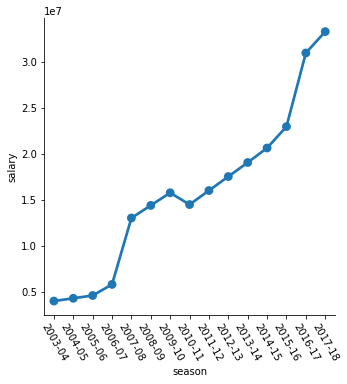

In [74]:
%matplotlib inline
sb.catplot(x='season', y='salary', data=lebron_salaries, kind='point').set_xticklabels(rotation=300)

In [75]:
mj_salaries = salaries[['player_id','salary','season','team']].loc[salaries['player_id']=='jordami01'].sort_values('season').head(20)

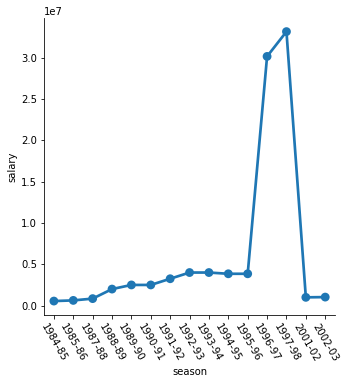

In [77]:
sb.catplot(x='season', y='salary', data=mj_salaries, kind='point').set_xticklabels(rotation=300)

In [76]:
mj_salaries

,player_id,salary,season,team
6846,jordami01,550000,1984-85,Chicago Bulls
6847,jordami01,630000,1985-86,Chicago Bulls
6848,jordami01,845000,1987-88,Chicago Bulls
6849,jordami01,2000000,1988-89,Chicago Bulls
6850,jordami01,2500000,1989-90,Chicago Bulls
6851,jordami01,2500000,1990-91,Chicago Bulls
6852,jordami01,3250000,1991-92,Chicago Bulls
6853,jordami01,4000000,1992-93,Chicago Bulls
6854,jordami01,4000000,1993-94,Chicago Bulls
6855,jordami01,3850000,1994-95,Chicago Bulls


In [ ]:
top_salaries = salaries[['player_id','salary','season','team']].sort_values('salary',ascending=False).head(10)
top_salaries

In [89]:
player_name = 'Carmelo Anthony'

# players[['_id','name','career_PTS','career_FG%']].loc[players['name']==player_name]

player_id = players[['_id']].loc[players['name']==player_name] # this will store the row number and id for the player

print(type(player_id))
print(player_id)

<class 'pandas.core.frame.DataFrame'>
           _id
113  anthoca01


In [90]:
melo_salaries = salaries[['player_id', 'salary', 'season', 'team']].loc[salaries['player_id']=='anthoca01'].sort_values('season').head(25)
melo_salaries

,player_id,salary,season,team
427,anthoca01,3229200,2003-04,Denver Nuggets
428,anthoca01,3471360,2004-05,Denver Nuggets
429,anthoca01,3713640,2005-06,Denver Nuggets
430,anthoca01,4694041,2006-07,Denver Nuggets
431,anthoca01,13041250,2007-08,Denver Nuggets
432,anthoca01,14410581,2008-09,Denver Nuggets
433,anthoca01,15779912,2009-10,Denver Nuggets
434,anthoca01,17149243,2010-11,New York Knicks
435,anthoca01,18518574,2011-12,New York Knicks
436,anthoca01,19450000,2012-13,New York Knicks


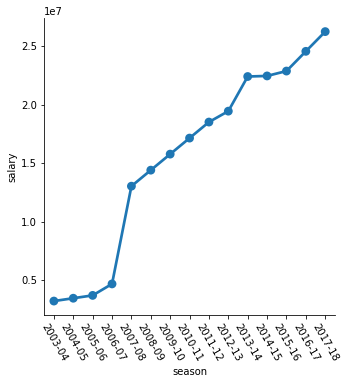

In [91]:
sb.catplot(x='season',y='salary',data=melo_salaries,kind='point').set_xticklabels(rotation=300)

In [87]:
shaq_salaries = salaries[['player_id', 'salary', 'season', 'team']].loc[salaries['player_id']=='onealsh01'].sort_values('season').head(25)
shaq_salaries

,player_id,salary,season,team
9417,onealsh01,3000000,1992-93,Orlando Magic
9418,onealsh01,3900000,1993-94,Orlando Magic
9419,onealsh01,4800000,1994-95,Orlando Magic
9420,onealsh01,5700000,1995-96,Orlando Magic
9421,onealsh01,10714000,1996-97,Los Angeles Lakers
9422,onealsh01,12857143,1997-98,Los Angeles Lakers
9423,onealsh01,15000000,1998-99,Los Angeles Lakers
9424,onealsh01,17142858,1999-00,Los Angeles Lakers
9425,onealsh01,19285715,2000-01,Los Angeles Lakers
9426,onealsh01,21428572,2001-02,Los Angeles Lakers


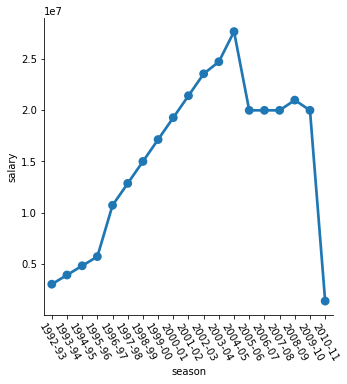

In [88]:
sb.catplot(x='season', y='salary', data=shaq_salaries, kind='point').set_xticklabels(rotation=300)

In [ ]:
shaq_salaries = salaries[['player_id','salary','season','team']].loc[salaries['player_id']=='jordami01'].sort_values('season').head(20)

In [23]:
tiger = players[['_id','name','career_PTS','career_FG%']].loc[players['name']=='Michael Jordan'] # get specific players

print(tiger)

            _id            name  career_PTS career_FG%
2188  jordami01  Michael Jordan        30.1       49.7


In [ ]:
# https://stackoverflow.com/questions/53255796/how-to-get-a-single-value-as-a-string-from-pandas-data-frame

players.sort_values('draft_year',ascending=False).head(10) # years go up to 2018, some weird columns because 
# of super old data

In [25]:
# df.loc[df['Host'] == 'a', 'Port'].item()

players.loc[players['name']=='Michael Jordan', '_id'].item()

'jordami01'

In [20]:
my_list = [3]

my_list.append(-1)

my_list

[3, -1]

In [107]:
# changes names to have underscores
my_name = 'Rain Lasch'

print(my_name.replace(' ', '_'))

Rain_Lasch
